## Project:Music Recommendation System

In [112]:
#Import dependencies

In [25]:
import os
import sys
import warnings
import pandas 
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [ ]:
#import dataset

In [26]:
df = pd.read_csv("/Users/yashaswipatki/Downloads/spotify_millsongdata.csv")
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [27]:
#drop "link" column
df.drop("link", axis=1, inplace = True)
df.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


In [28]:
df = df[0:20000]
df.drop_duplicates(subset="song", inplace=True)
df.reset_index(drop = True, inplace = True)

In [29]:
#rename columns
df.rename(columns = {"artist":'Artist','song':'Song','text':'Lyrics'},inplace = True)
df.head(6)

,Artist,Song,Lyrics
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,"Well, you hoot and you holler and you make me ..."


In [30]:
#heck for missing values in each column
df.isnull().sum()

Artist    0
Song      0
Lyrics    0
dtype: int64

In [31]:
#check for duplicates
df.duplicated().sum()

0

In [32]:
#check columns
df.columns

Index(['Artist', 'Song', 'Lyrics'], dtype='object')

In [33]:
#combine the features 'Artist', 'Song', and 'Lyrics' into a single feature named 'Combined_features'
df['Combined_features'] = df['Artist']+" "+df['Song']+" "+df['Lyrics']

In [55]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yashaswipatki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
#taking a text input and performing several text cleaning operations using regular expressions and NLTK library functions
import re
import nltk
from nltk.corpus import stopwords
def cleaning(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [100]:
# apply the cleaning function to each element in the 'Combined_features' column of the DataFrame df
df['Combined_features'] = df['Combined_features'].apply(func = cleaning)

In [101]:
#find the index of the song specified by song_user_likes in the DataFrame df
song_user_likes = "Hey Hey"
matching_rows = df[df['Song'] == song_user_likes]

if not matching_rows.empty:
    song_index = matching_rows.index[0]
    print(f"Song index found: {song_index}")
else:
    print("No matching song found.")


Song index found: 5057


In [102]:
#initialize a TF-IDF vectorizer and create a TF-IDF matrix based on the combined features of the DataFrame df
rsv = TfidfVectorizer(max_features = 20000)
rsv_matrix = rsv.fit_transform(df["Combined_features"])

In [103]:
# Calculate cosine similarity matrix using the TF-IDF matrix
cosine_sim = cosine_similarity(rsv_matrix)

In [104]:
#Define any song
song_user_likes = "Hey Hey"
# Find the index of the song in the DataFrame where the song name matches the specified song_user_likes
# .index[0] is used to get the index of the first matching song
song_index = df[df.Song == song_user_likes].index[0]

In [105]:
#Enumerate the cosine similarity scores of the song specified by song_index with all other songs
similar_songs = list(enumerate(cosine_sim[song_index]))

In [106]:
# Sort the list of similar songs based on cosine similarity scores in descending order
similar_song_sorted = sorted(similar_songs,key = lambda x:x[1],reverse = True)

In [107]:
#recommend similar songs to a given song that the user likes.
def recommended_songs(song_user_likes):
    song_index = df[df.Song == song_user_likes].index[0]
    similar_songs = list(enumerate(cosine_sim[song_index]))
    similar_song_sorted = sorted(similar_songs, key=lambda x:x[1], reverse=True)
    
    for song in similar_song_sorted[1:11]:
        similar_songs = df[df.index == song[0]]["Song"].values[0]
        print(similar_songs)

In [108]:
#recommend similar songs to the song "International" based on their textual features and cosine similarity scores.
recommended_songs("International")

The Last Of The Famous International Playboys
Bound For Glory
The Last Jesus
Hey Hey
The Best Damn Thing
Shine My Shoes
Good Morning Britain (Aztec Camera)
Look At Little Sister
Jesus, Jesus
No Need For Conversation


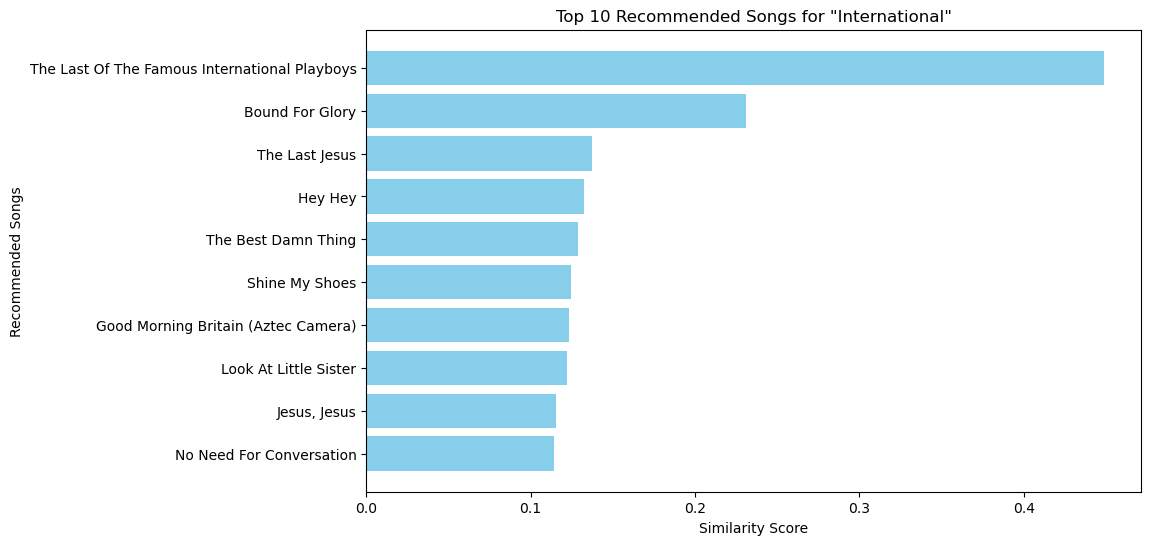

In [109]:
#a visual representation of the similarity scores between the input song and the recommended songs, helping users to identify similar songs.
import matplotlib.pyplot as plt

def recommended_songs(song_user_likes):
    song_index = df[df.Song == song_user_likes].index[0]
    similar_songs = list(enumerate(cosine_sim[song_index]))
    similar_song_sorted = sorted(similar_songs, key=lambda x:x[1], reverse=True)
    
    recommended_songs = []
    similarity_scores = []
    
    for song in similar_song_sorted[1:11]:
        recommended_song = df[df.index == song[0]]["Song"].values[0]
        similarity_score = song[1]
        recommended_songs.append(recommended_song)
        similarity_scores.append(similarity_score)
        
    return recommended_songs, similarity_scores

song_user_likes = "International"
recommended_songs_list, similarity_scores = recommended_songs(song_user_likes)

plt.figure(figsize=(10, 6))
plt.barh(recommended_songs_list, similarity_scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.ylabel('Recommended Songs')
plt.title(f'Top 10 Recommended Songs for "{song_user_likes}"')
plt.gca().invert_yaxis()
plt.show()


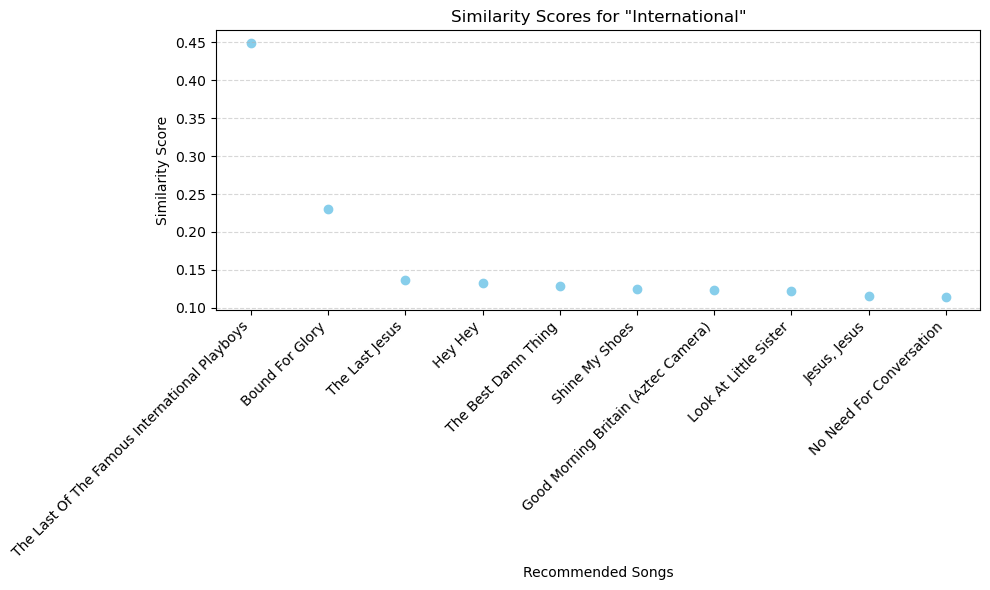

In [111]:
#more precise visual representation
def recommended_songs(song_user_likes):
    song_index = df[df.Song == song_user_likes].index[0]
    similar_songs = list(enumerate(cosine_sim[song_index]))
    similar_song_sorted = sorted(similar_songs, key=lambda x:x[1], reverse=True)
    
    recommended_songs = []
    similarity_scores = []
    
    for song in similar_song_sorted[1:11]:
        recommended_song = df[df.index == song[0]]["Song"].values[0]
        similarity_score = song[1]
        recommended_songs.append(recommended_song)
        similarity_scores.append(similarity_score)
        
    return recommended_songs, similarity_scores

song_user_likes = "International"
recommended_songs_list, similarity_scores = recommended_songs(song_user_likes)

plt.figure(figsize=(10, 6))
plt.scatter(recommended_songs_list, similarity_scores, color='skyblue')
plt.xlabel('Recommended Songs')
plt.ylabel('Similarity Score')
plt.title(f'Similarity Scores for "{song_user_likes}"')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
